DTSA-5509 Final Project

This dataset contains statistics on the world's billionaires, including information about their businesses, industries, and personal details. It provides insights into the wealth distribution, business sectors, and demographics of billionaires worldwide.
You can find it at:
https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data

The model will try to classify billionaires into either self-made or not self-made categories using ensemble machine learning models (random forest, extra trees, gradient boosting). Performance evaluation is included, alongside an EDA, data cleaning, feature engineering and hyperparameter tuning.
If you want to run the code, you will need to put the .csv file in the same folder as the Jupyter notebook and rename the original .csv file from Kaggle to 'data.csv'. Alternatively, you can use the .csv from the Github repo.

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import seaborn as sns
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, auc, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

EDA
The following cells are dedicated to exploratory data analysis. Here you can see the dataframe with all of its columns, values and data types. There are 2640 rows and 35 columns present.
You can see further information about boolean and object columns through descriptive statistics as well using the describe() function.

In [2]:
#read the csv
df = pd.read_csv('data.csv')

In [3]:
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [3]:
df.select_dtypes(include=['object','bool']).describe().T

,count,unique,top,freq
category,2640,18,Finance & Investments,372
personName,2640,2638,Wang Yanqing & family,2
country,2602,78,United States,754
city,2568,741,New York,99
source,2640,906,Real estate,151
industries,2640,18,Finance & Investments,372
countryOfCitizenship,2640,77,United States,735
organization,325,294,Meta Platforms,4
selfMade,2640,2,True,1812
status,2640,6,D,1223


In [4]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

Data Cleaning 

Now comes the task of cleaning the data. First up, I drop the columns which won't be used/needed in our models. These are mostly personal information (name, residence, birthday etc.)
Then, I modify the NA values in the dataframe and replace them with the last valid observation. After removing duplicate entries I also make sure to modify the 'gdp_country' column, since the original value is a string (e.g. $19,900,000) and I need it to be a numerical value, so I remove the Dollar signs and commas.

In [5]:
df.drop(columns=['category','country','state','birthDate','date','personName','city','source','industries','countryOfCitizenship','organization','lastName','firstName','birthDay','birthMonth','birthYear', 'title','residenceStateRegion'],inplace=True)

In [6]:
for col in df:
    df[col] = df[col].fillna(method='ffill')
    
for column in df:
    mode_value = df[column].mode()[0]    
    df[column]=df[column].fillna(mode_value)    

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['gdp_country'] = df['gdp_country'].str.replace('$','').replace(',','', regex=True).astype(float)

Visualization

Here are a few graphs depicting some interesting facts about the dataset. I've also decided to include a correlation heatmap to showcase the correlation between the columns.
The heatmap provides a quick visual overview of the pairwise correlations between the selected numerical columns. It helps in identifying potential multicollinearity or relationships between features, which is crucial for feature selection and understanding how features might influence each other.

<Axes: xlabel='gender', ylabel='count'>

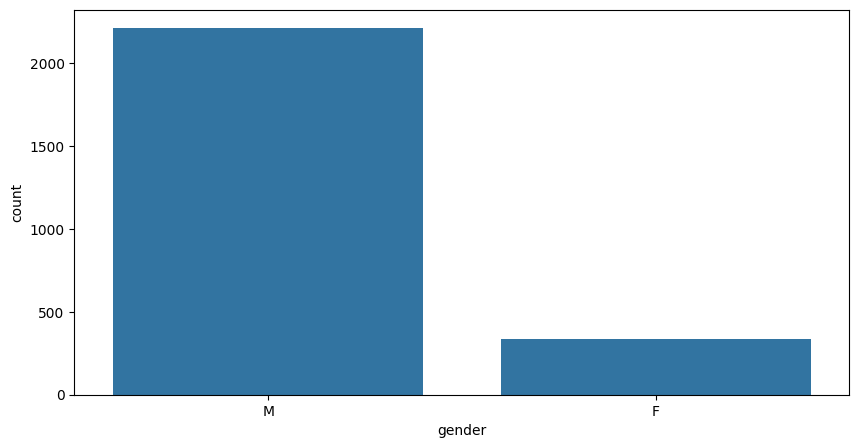

In [7]:
plt.figure(figsize=(10,5))
gen = df['gender'].value_counts().reset_index()[:10]
sns.barplot(x='gender', y='count', data=gen)

<Axes: xlabel='selfMade', ylabel='count'>

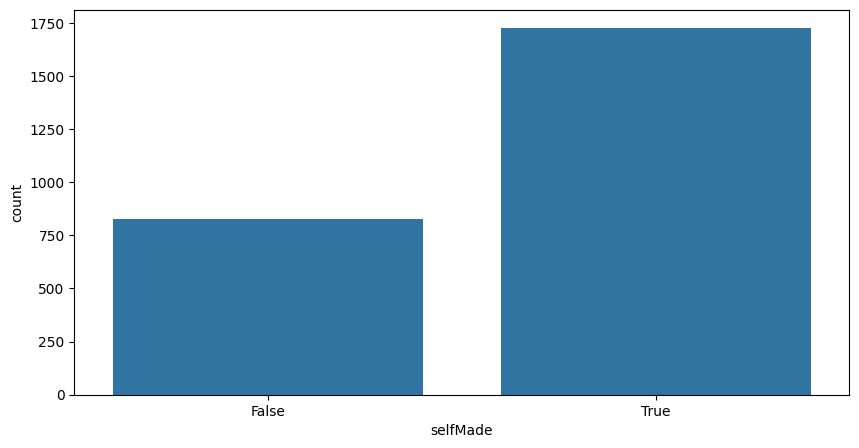

In [14]:
plt.figure(figsize=(10,5))
sm = df['selfMade'].value_counts().reset_index()[:10]
sns.barplot(x='selfMade', y='count', data=sm)

<Axes: xlabel='status', ylabel='count'>

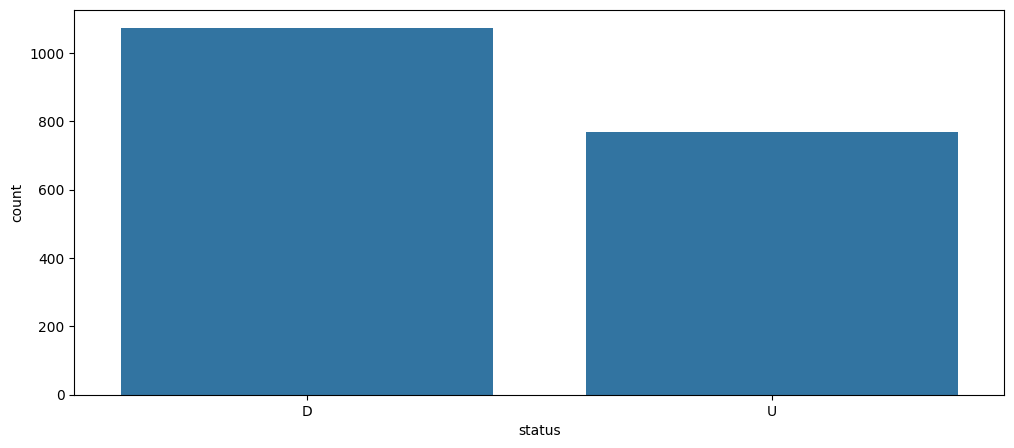

In [21]:
plt.figure(figsize=(12,5))
st = df['status'].value_counts().reset_index()[:2]
sns.barplot(x='status', y='count', data=st)

<Axes: >

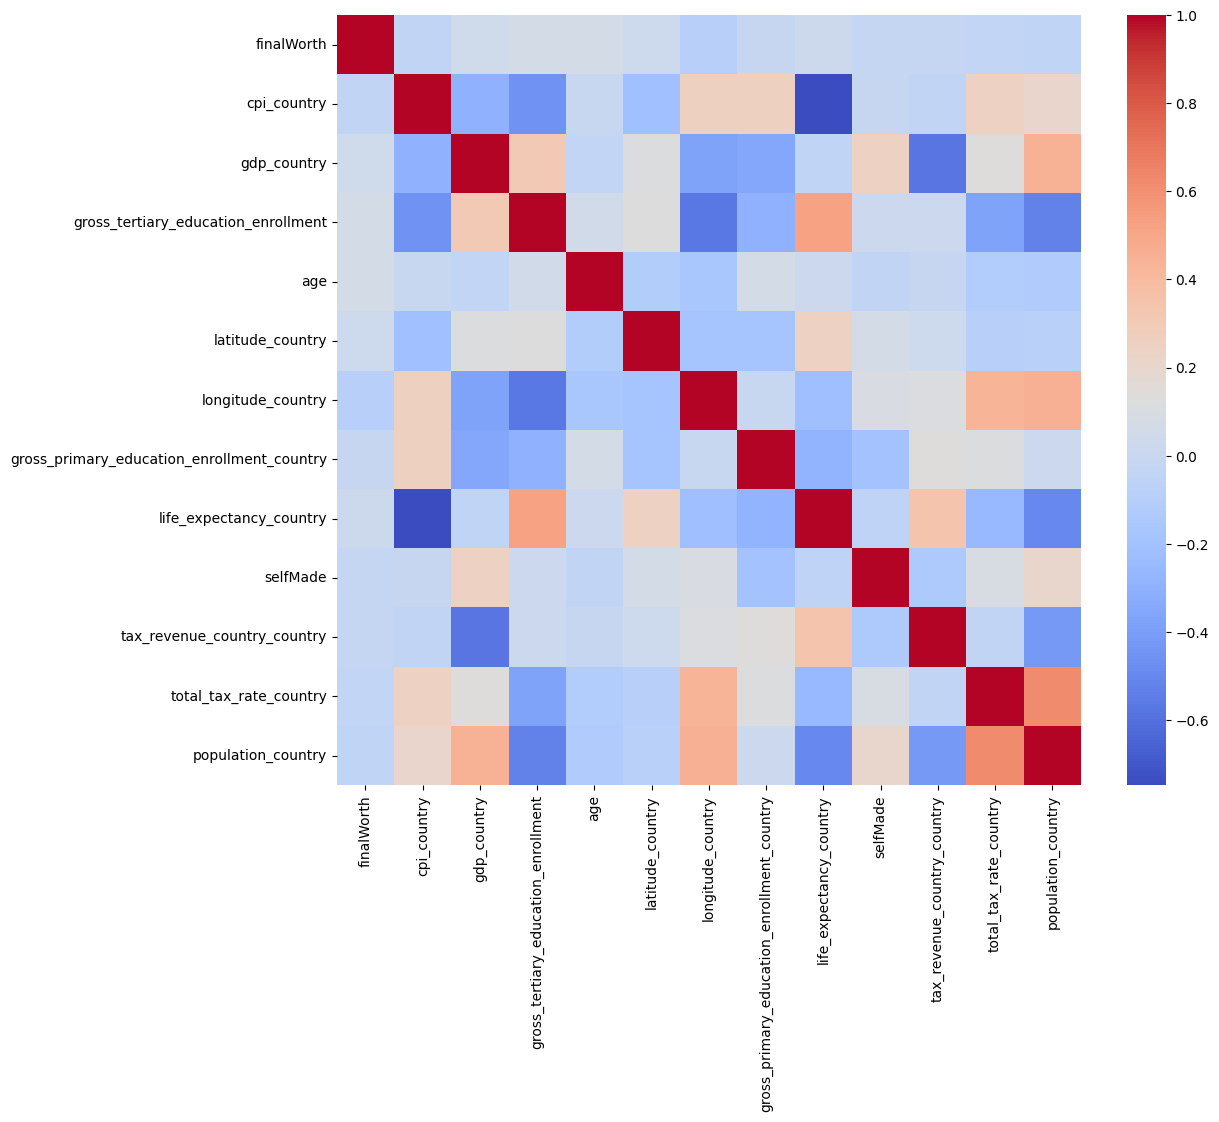

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['finalWorth','cpi_country', 'gdp_country',
       'gross_tertiary_education_enrollment','age','latitude_country','longitude_country',
       'gross_primary_education_enrollment_country', 'life_expectancy_country','selfMade',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country']].corr(), cmap='coolwarm')

Feature Engineering

First off, we should remove the outliers using the Z-score. For every numerical value, I compute the Z-score and if it exceeds 3 its index is stored and removed from the data frame.
Then we split the continuous values of the 'rank' column into categories (bins), each having its own label. This allows us to work with ranges or groups of values.
I also apply polynomial features to capture non-linear relationships and interactions between features. From now on, X_pf will be the dataframe.
Next up, I remove some low variance (<0.25) features as they likely won't contribute much to the model.
And finally, features are standardized using StandardScaler(), thus transforming them to have zero mean and unit variance. This is done in order to ensure that features with different scales do not dominate.

In [9]:
num_outlier=[]
num_cols = df.select_dtypes(include=['float64','int64'])
print("Rows in the data prior to outlier deletion: {:,}".format(df.shape[0]))

for column in num_cols.columns:
    z = np.abs(stats.zscore(df[column]))
    threshold = 3
    outliers = df[z > threshold]
    num_outlier.append(len(outliers))
    df.drop(outliers.index,inplace=True) 
     
print("Rows in the data after deleting the outliers: {:,}".format(df.shape[0]))    

Rows in the data prior to outlier deletion: 2,551
Rows in the data after deleting the outliers: 2,355


In [10]:
df['rank']=pd.cut(df['rank'],[0,500,1000,1500,2000,2600],labels=[1,2,3,4,5])

In [11]:
y=df.selfMade
X=df.drop('selfMade', axis=1) # target

# avoiding collinearity
X=pd.get_dummies(X, columns=['status','gender'], drop_first=True)

# initialize a polynomial features object to transform the features and create a new dataframe with both the original and polynomial features
pf = PolynomialFeatures(interaction_only=True, include_bias=False)
X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names_out(X.columns))
X_pf.head()

,rank,finalWorth,age,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,...,status_N status_R,status_N status_Split Family Fortune,status_N status_U,status_N gender_M,status_R status_Split Family Fortune,status_R status_U,status_R gender_M,status_Split Family Fortune status_U,status_Split Family Fortune gender_M,status_U gender_M
0,1.0,33400.0,54.0,125.08,2.9,1.991000e+13,50.6,100.2,77.0,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,32600.0,74.0,105.48,0.5,5.081770e+12,63.2,98.8,84.2,11.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,32100.0,65.0,119.62,1.7,2.827113e+12,60.0,101.2,81.3,25.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,31600.0,74.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,31600.0,72.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
# detect low variance features
var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(X_pf)
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
# remove low variance features
concol = [column for column in X_pf.columns 
          if column not in X_pf.columns[var_thr.get_support()]]

X_pf.drop(concol,axis=1,inplace=True)

In [14]:
# feature standardization
scaler=StandardScaler()
X_pf=pd.DataFrame(scaler.fit_transform(X_pf), columns=X_pf.columns)

Modeling
The data is split into three sets: training (50%) validation (25%) and testing (25%).
This section trains several machine learning models (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, and XGBClassifier) on the training set and evaluates their performance on the validation sets using the F1 score as the metric.
Once that's done, our validation and training feature matrices and target vectors are combined to allow the model to learn from a larger pool.

In [15]:
# split the data into train, validation and test sets
X_train, X2, y_train, y2 = train_test_split(X_pf, y, train_size=0.5, 
                                            stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5,
                                                stratify=y2)

In [16]:
models= [RandomForestClassifier(), ExtraTreesClassifier(),  GradientBoostingClassifier(),XGBClassifier()]

train_score=[]
validation_score=[]

for model in models:
    
    model.fit(X_train,y_train)
    y_train_pred= model.predict(X_train)
    train_score.append(f1_score(y_train_pred,y_train))
    y_val_pred=model.predict(X_val)
    validation_score.append(f1_score(y_val_pred,y_val))

In [17]:
f2=go.Figure()
models= ['RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier','XGBClassifier']

f2.add_trace(go.Bar(x=models, y=train_score, name='Train', text=train_score , textposition='outside',
                     texttemplate='%{text:.2f}%', width=0.38, 
                     hovertemplate='accuracy of %{x} = %{y:.2f}%<extra></extra>',
                     marker=dict(color='#FA3434', opacity=0.8)))
f2.add_trace(go.Bar(x=models, y=validation_score, name='validation', text=validation_score, textposition='outside',
                     texttemplate='%{text:.2f}%', width=0.38, 
                     hovertemplate='accuracy of %{x} = %{y:.2f}%<extra></extra>',
                     marker=dict(color='#D7BBA8', opacity=0.8)))


temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
f2.update_traces(marker=dict(line=dict(width=1, color='#000000')))
f2.update_layout(title="Model Comparision", showlegend=True, template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=.97),
                  barmode='group', bargap=.15)
f2.update_yaxes(range=(0,1.1))

In [18]:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

Hyperparameter tuning

The cell below helps to find the optimal hyperparameters for the RandomForestClassifier and assesses its performance on both the training and test sets.
The grid search performs 5 cross-validations to find the best hyperparameters of the random forest.
Once the best model and parameters are found, the model is retrained on the entire training set and its recall, precision and F1 scores are computed to denote the performance (visualization below).

As there are multiple options specified in the parameter grid, this cell will take a while to execute (~30 min on my laptop).


In [45]:
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# set the random seed for reproducibility
random_state = 25
np.random.seed(random_state)

model = RandomForestClassifier(class_weight='balanced',random_state=random_state)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_val, y_train_val)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# retraining the model on the whole train set
best_model.fit(X_train_val, y_train_val)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5, n_estimators=200, random_state=25)

In [50]:
# performance evaluation on both train and test sets
y_train_val_pred = best_model.predict(X_train_val)
f1_train = f1_score(y_train_val_pred, y_train_val)
y_test_pred = best_model.predict(X_test)
f1_test = f1_score(y_test_pred, y_test)
precision_train = precision_score(y_train_val_pred, y_train_val)
precision_test = precision_score(y_test_pred, y_test)
recall_train = recall_score(y_train_val_pred, y_train_val)
recall_test = recall_score(y_test_pred, y_test)


print('F1-score on the train set:', f1_train)
print('F1-score on the test set:', f1_test,'\n')
print('Precision on the train set:', precision_train)
print('Precision on the test set:', precision_test,'\n')
print('Recall on the train set:', recall_train)
print('Recall on the test set:', recall_test)

F1-score on the train set: 0.909371384496722
F1-score on the test set: 0.8384180790960453 

Precision on the train set: 0.9727722772277227
Precision on the test set: 0.9160493827160494 

Recall on the train set: 0.8537291817523533
Recall on the test set: 0.7729166666666667


Evaluation & visualization

<Figure size 640x480 with 0 Axes>

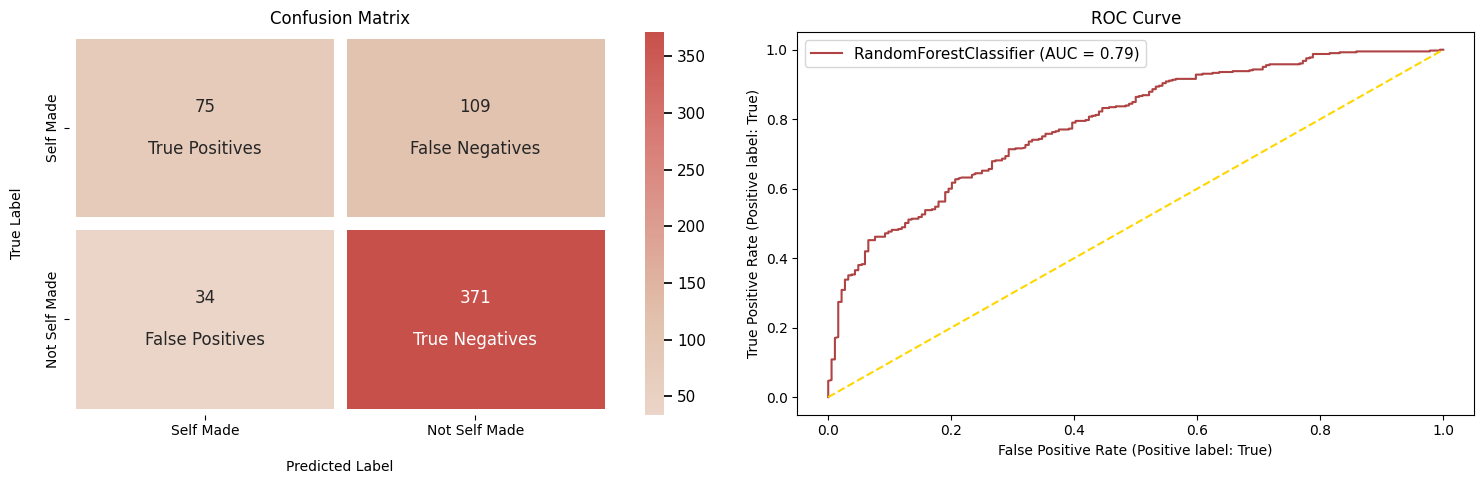

In [47]:
cm = confusion_matrix(y_test,y_test_pred ,labels=[0,1])
plt.subplots_adjust(hspace=0.5)
warm=LinearSegmentedColormap.from_list('warm', 
                                       [(0, '#EBD5C8'), 
                                        (0.25, '#E1C1AD'),
                                        (.75, '#D77873'), 
                                        (1, '#C8504A')], N=256)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

classes=['Self Made','Not Self Made']
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = [f'{i}\n\n{j}' for i, j in zip(cm.flatten(), label)]
annot = np.asarray(annot).reshape(2,2)

sns.set_context('notebook') 
sns.heatmap(cm, annot=annot, fmt='', cmap=warm, linecolor='white', linewidths=8, ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('\nPredicted Label')
ax[0].set_ylabel('True Label\n')
ax[0].xaxis.set_ticklabels(classes)
ax[0].yaxis.set_ticklabels(classes)


y_proba= best_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)
RocCurveDisplay.from_estimator(best_model, X_test, y_test,ax=ax[1],color="#AF4343")
sns.lineplot(x = [0, 1], y = [0, 1], color = 'gold', linestyle="dashed",ax=ax[1])
ax[1].set_title('ROC Curve')

plt.tight_layout()
plt.show()

In [48]:
# top 50 important features

ft_importance=pd.DataFrame(index=X_pf.columns)
ft_importance['feature_importances']=best_model.feature_importances_  
ft_importance=ft_importance.feature_importances.nlargest(50).sort_values(ascending=True)

pal=sns.color_palette("Reds_r", 50).as_hex()
fig=go.Figure()
for i in range(len(ft_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=ft_importance[i], 
                       line_color=pal[::-1][i],opacity=0.8,line_width=4))
fig.add_trace(go.Scatter(x=ft_importance, y=ft_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,
                         hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))
fig.update_layout(template=temp,title='Random Forest Feature Importance<br>Top 50', 
                  margin=dict(l=150,t=80),
                  xaxis=dict(title='Importance', zeroline=False),
                  yaxis_showgrid=False, height=1000, width=800)
fig.show()


Conclusion
The machine learning model, based on a Random Forest classifier, demonstrates solid performance in predicting whether billionaires are self-made or not. The F1 score, a metric that balances precision and recall, achieved over 90% on the training set and around  85% on the testing set. These scores indicate a robust ability to correctly identify both positive and negative instances, highlighting the model's effectiveness in binary classification, although certain improvements could be made such as integrating domain knowledge to enhance the interpretability of the model and improve its ability to capture subtle patterns in the data.
